<a href="https://colab.research.google.com/github/EduHdzVillasana/Procesamiento_MCD/blob/main/Tarea%204/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 4: Procesamiento y Clasificación de Datos

- Hacer algo análogo a: Encontrar centros de objetos circulares de imágenes de Internet o tomadas por el alumno.
- Compartir hallazgos con el grupo a través de un reporte en Markdown o un PDF en latex.

## Alumno: Eduardo Alan Hernandez Villasana

### Matrícula: 1941416

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
imagen = cv2.imread('/content/drive/MyDrive/importante-senalar-billetes-monedas-vender_0_52_1201_747.jpeg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

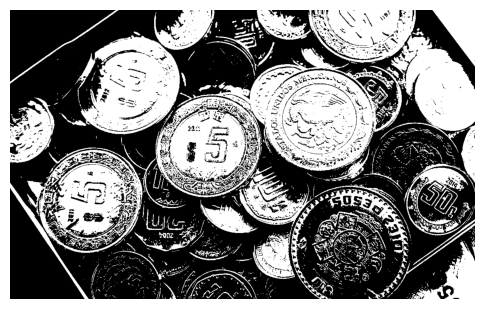

In [13]:
grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
_, binaria = cv2.threshold(grises, 128, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6,6))
plt.imshow(binaria, cmap='gray')
plt.axis("off")
plt.show()

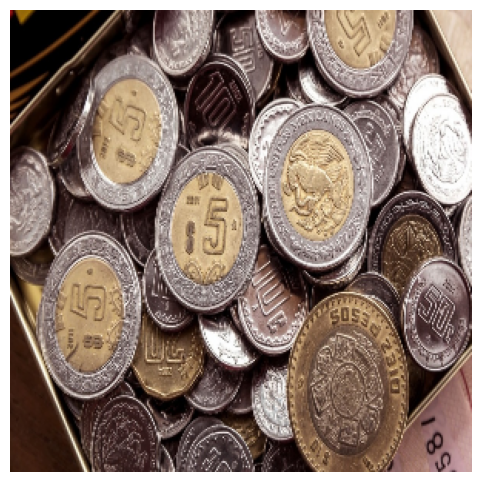

In [14]:
#Redimencional la fotografía
imagen_redimensionada = cv2.resize(imagen_rgb, (300, 300))

plt.figure(figsize=(6,6))
plt.imshow(imagen_redimensionada)
plt.axis("off")
plt.show()

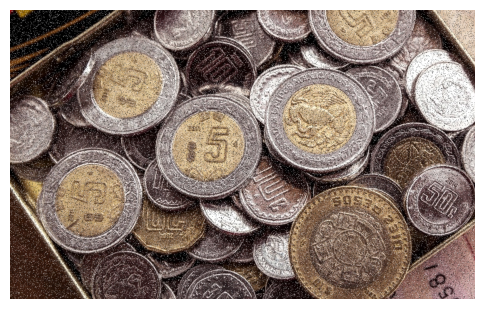

In [15]:
#Salt and papper
def agregar_ruido_sal_pimienta(img, prob=0.02):
    ruido = img.copy()
    num_pixeles = int(prob * img.size)

    # Sal (blanco)
    coords = [np.random.randint(0, i - 1, num_pixeles) for i in img.shape[:2]]
    ruido[coords[0], coords[1], :] = 255

    # Pimienta (negro)
    coords = [np.random.randint(0, i - 1, num_pixeles) for i in img.shape[:2]]
    ruido[coords[0], coords[1], :] = 0

    return ruido

imagen_ruido = agregar_ruido_sal_pimienta(imagen_rgb)

plt.figure(figsize=(6,6))
plt.imshow(imagen_ruido)
plt.axis("off")
plt.show()


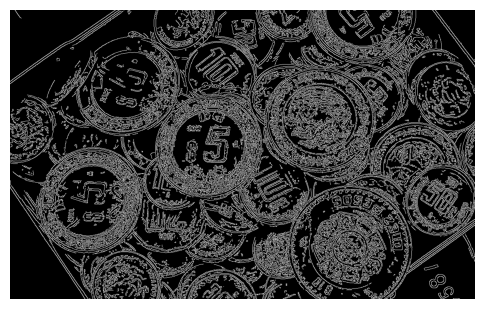

In [16]:
# Bordes
bordes = cv2.Canny(grises, 100, 200)

plt.figure(figsize=(6,6))
plt.imshow(bordes, cmap='gray')
plt.axis("off")
plt.show()

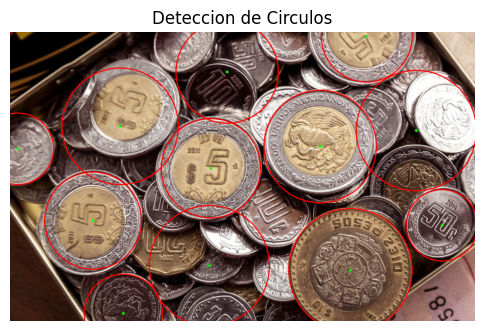

In [18]:
circulos = cv2.HoughCircles(
    grises, cv2.HOUGH_GRADIENT, dp=1.2, minDist=250,
    param1=150, param2=60,
    minRadius=50, maxRadius=160
)


imagen_circulos = imagen_rgb.copy()
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for i in circulos[0, :]:
        cv2.circle(imagen_circulos, (i[0], i[1]), i[2], (255, 0, 0), 2)
        cv2.circle(imagen_circulos, (i[0], i[1]), 2, (0, 255, 0), 3)

plt.figure(figsize=(6,6))
plt.imshow(imagen_circulos)
plt.title("Deteccion de Circulos")
plt.axis("off")
plt.show()
